<a href="https://colab.research.google.com/github/erinijapranckeviciene/ppolygenic/blob/master/ppolygenic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Functions to compute and use TGS**

In [28]:
from math import erf,exp
from itertools import product

import numpy as np
import csv


################################################################################
# Data structure  markers to store information about the multimaarker phenotype
#
markers = \
    {'injury': \
     {'rs12722':  {'gene':'COL5A1','genotype_scores':{'TT':1,'CT':0,'CC':-1},'frequencies':{'TT':0.07,'CT':0.36,'CC':0.57}, 'conf': 1},\
      'rs1800012':{'gene':'COL1A1','genotype_scores':{'CC':0,'AC':0,'AA':-1},'frequencies':{'CC':0.66,'AC':0.30,'AA':0.04}, 'conf': 1},\
      'rs679620': {'gene':'MMP3',  'genotype_scores':{'AA':1,'AG':0,'GG':-1},'frequencies':{'AA':0.31,'AG':0.53,'GG':0.16}, 'conf': 0.75}},\
    'endurance_power': \
     {'rs699':     {'gene':'AGT', 'genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.0676, 'AG': 0.3848, 'GG': 0.5476},'allele_freq':{'A':0.26,'G':0.74}, 'conf': 1},\
      'rs1042713': {'gene':'ADRB2','genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.2304, 'AG': 0.4992, 'GG': 0.2704},'allele_freq':{'A':0.48,'G':0.52}, 'conf': 1},\
      'rs11549465':{'gene':'HIF1A','genotype_scores':{'CC': 1, 'CT': 0, 'TT': -1},'frequencies':{'CC': 0.8575, 'CT': 0.1370, 'TT': 0.0055},'allele_freq':{'C':0.926,'T':0.074}, 'conf': 1}},\
    'vitaminB12': \
     {'rs1801133':    {'gene':'MTHFR', 'genotype_scores':{'GG': 0, 'AG': -0.7, 'AA': -1},'frequencies':{'GG': 0.57, 'AG': 0.33, 'AA': 0.1},'conf': 1},\
      'rs602662': {'gene':'FUT2','genotype_scores':{'AA': 0.7, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.20, 'AG': 0.35, 'GG': 0.45}, 'conf': 1},\
      'rs526934':{'gene':'TCN1','genotype_scores':{'AA': 0, 'AG': -1, 'GG': -1},'frequencies':{'AA': 0.65, 'AG': 0.30, 'GG': 0.05}, 'conf': 1},\
      'rs1801222':{'gene':'CUBN','genotype_scores':{'CC': 1, 'CT': 0, 'TT': -1},'frequencies':{'CC': 0.65, 'CT': 0.30, 'TT': 0.05}, 'conf': 1}}}



##############################################################################
# Data structure  -markers- extended with additional block of different markers
markers_plus ={ \
# Injury
'injury': \
     {'rs12722':  {'gene':'COL5A1','genotype_scores':{'TT':1,'CT':0,'CC':-1},'frequencies':{'TT':0.07,'CT':0.36,'CC':0.57}, 'conf': 1},\
      'rs1800012':{'gene':'COL1A1','genotype_scores':{'CC':0,'AC':0,'AA':-1},'frequencies':{'CC':0.66,'AC':0.30,'AA':0.04}, 'conf': 1},\
      'rs679620': {'gene':'MMP3',  'genotype_scores':{'AA':1,'AG':0,'GG':-1},'frequencies':{'AA':0.31,'AG':0.53,'GG':0.16}, 'conf': 0.75}},\

# Vilnius endurance_power
     'endurance_power_vilnius': \
                {'rs1799752':     {'gene':'ACE', 'genotype_scores':{'DD': 1, 'ID': 0, 'II': -1},'allele_freq':{'I':0.43,'D':0.57}, 'conf': 1},\
                 'rs1815739':     {'gene':'ACTN3', 'genotype_scores':{'RR': 1, 'RX': 0, 'XX': -1},'allele_freq':{'R':0.65,'X':0.35}, 'conf': 1},\
                 'rs7293': {'gene':'MB','genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'allele_freq':{'A':0.5,'G':0.5}, 'conf': 0.75},\
                 'rs17602729':{'gene':'AMPD1','genotype_scores':{'CC': 1, 'CT': -1, 'TT': -1},'allele_freq':{'C':0.85,'T':0.15}, 'conf': 0.75}},\

# Endurance_power
    'endurance_power': \
     {'rs699':     {'gene':'AGT', 'genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.0676, 'AG': 0.3848, 'GG': 0.5476},'allele_freq':{'A':0.26,'G':0.74}, 'conf': 1},\
      'rs1042713': {'gene':'ADRB2','genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.2304, 'AG': 0.4992, 'GG': 0.2704},'allele_freq':{'A':0.48,'G':0.52}, 'conf': 1},\
      'rs11549465':{'gene':'HIF1A','genotype_scores':{'CC': 1, 'CT': 0, 'TT': -1},'frequencies':{'CC': 0.8575, 'CT': 0.1370, 'TT': 0.0055},'allele_freq':{'C':0.926,'T':0.074}, 'conf': 1}}}

#################################################################
# Labels to generate synthetic data
labels={'injury':{'risk':0.50,'no-risk':0.5},'endurance_power':{'endurance':0.35,'mix':0.35,'power':0.30},'vitaminB12':{'high':0.20,'higher':0.20,'normal':0.20,'lower':0.20,'low':0.20}}
##################################################################
# TGS computation
def total_genotype_score(markers_list,markers_dict):
    """
    total_genotype_score(markers_list,markers_dict)
    Function: computes a total genotype score TGS
    Input: 
        markers_list: 
          string of comma separated pairs of a marker rs id
          followed by whitespace followed by a genotype. Example:
          markers_list='rs12722 TT, rs1800012 AA, rs679620 AG'
        markers_dict: 
          dictionary of markers. Example: markers['injury']  
    Return value: 
        float TGS:
          total genotype score computed as a dot product of two vectors 
          a vector of individual genotype scores and 
          a vector of marker confidence scores 
    """

    id_gt_pairs = markers_list.split(',')
    n_gt_pairs  = len(id_gt_pairs)
#    if n_gt_pairs <> 3 : # number of markers may be arbitrary, here 3  
    if n_gt_pairs < 2 : # test if it is multimarker, STOP if it is one marker
            return -101

    gt_score    = list() # vector of marker scores
    marker_conf = list() # vector of confidence scores
    for id_gt in id_gt_pairs:
        if len(id_gt.split()) != 2:
            print("<p> part is missing</p>")
            return -104

        (identity,genotype) = id_gt.split()
        #print identity, genotype
        if identity in markers_dict:
            marker_conf.append(float(markers_dict[identity]['conf']))
        else:
            print("<p> Invalid identity </p>")
            return -102 # Invalid identity

        if genotype in markers_dict[identity]['genotype_scores']:
            gt_score.append(float(markers_dict[identity]['genotype_scores'][genotype]))
        else:
            print("<p> Invalid genotype </p>")
            return -103 # Invalid genotype    
      
    # apply error function to map the score into [-1 , 1] interval
    score = sum([gt_score[i]*marker_conf[i] for i in range(0,n_gt_pairs)])

    # normalization constant is a sum of confidences
    normalization_constant = sum(markers_dict[i]['conf'] for i in markers_dict.keys())

    # normalized score
    normalized_score = score/normalization_constant

    #erf_score = erf(normalized_score)
    # apply sigmoid function and constant shift into interval [-1,1]
    #sigmoid_score = 1/(1+exp(-normalized_score))-0.5
    # return original score and a normalized_score
    #return [score,normalized_score,erf_score,sigmoid_score]
    return [score,normalized_score]

#####################################################################################  
# test total_genotype_score
def genotype_combinations_tgs(markers_dict):

    """
    Testing TGS function on all possible genotype combinations 
    It works with any type of markers and any number of marker states
    """
    genotypes_list    = list() # list of genotypes of each marker
    marker_names_list = list() # list of marker names (rs ids)

    for marker_id in markers_dict:
        genotypes_list.append(list(markers_dict[marker_id]['genotype_scores'].keys() ))
        #print(marker_id)
        marker_names_list.append(marker_id)
    #print("genotypes_list")    
    #print(genotypes_list)
    #print("marker_names_list")
    #print(marker_names_list)
    

    # Enumerate explicitly all possible combinations of genotypes.  
    # Generate string for a command: list(itertools.product(['TT','CT','CC'],...,['AA','AG','GG']))

    arg_i = list() # arguments for itertools.product()
    for marker_genotypes in genotypes_list:
        arg_i.append(str(marker_genotypes))
        #Evaluate itertools.product command and get all combinations of genotype indexes
        #print("arg_i")
        #print(arg_i)
        #arg_i : ["dict_keys(['TT', 'CT', 'CC'])", "dict_keys(['CC', 'AC', 'AA'])", "dict_keys(['AA', 'AG', 'GG'])"]
        #print("join")
        #print("list(product("+",".join(arg_i)+") )")
  
    genotype_combinations = eval("list(product("+",".join(arg_i)+"))")
    #print(genotype_combinations)

    tgs_vec               = list()
    table_gt_combinations = list()
    header = "Index"+","+",".join(marker_names_list)+","+",".join(["TGS","TGS_normalized"])
    table_gt_combinations.append(header)

    for gt_index,gt_combination in enumerate(genotype_combinations):
        arg_i=list() # arg_i parameter string to call TGS function
        for index,genotype in enumerate(gt_combination):
            arg_i.append(marker_names_list[index]+" "+genotype)
        # print(arg_i)    

        tgs = total_genotype_score(",".join(arg_i),markers_dict) # Compute TGS
        tgs_str = ["%.4f" % tgs[i] for i in range(len(tgs))]
        line=str(gt_index)+","+",".join(gt_combination)+","+",".join(tgs_str) #Add row to the table
        table_gt_combinations.append(line) #Add row to the table
        tgs_vec.append(tgs[0]) # TGS non-normalized 

    tgs_frequency_dist=list()     # Create dictionary for TGS frequency distribution 
    tgs_frequency_dist.append(['Value','Count'])
    tgs_values=list(set(tgs_vec)) # Count unique score occurrences
    for x in tgs_values:
        tgs_frequency_dist.append([x,tgs_vec.count(x)])
    # sort by value
    #print tgs_frequency_dist
    return [table_gt_combinations,tgs_frequency_dist]


#####################################################################################  
# generate sample of size n for multiple markers 
# add random phenotypic information
def generate_marker_table(markers,n,labels):
    """
    Input:
        markers - markers[phenotype] Ex: markers['injury']
        n -  number of rows in the sample
        labels - dictionary of phenotype labels Ex: {'endurance':0.35,'mix':0.35,'power':0.30} 
    Output:
        table in which each column represents a marker
        last column  class represents phenotypic information 
    """
    table = {}
    for rsid in markers.keys():
        m = np.random.choice(markers[rsid]['frequencies'].keys(),n,markers[rsid]['frequencies'].values())
        table[rsid] = m
    table['class'] = np.random.choice(labels.keys(),n,labels.values())
    return table


#####################################################################################  
# write synthetic multi marker table to file
def marker_table_to_csv(marker_table, output_csv_file_name):

    # create object to write to csv file
    csv_writer = csv.writer(open(output_csv_file_name,'w'),delimiter=',')
    header = marker_table.keys()
    n = len(marker_table[header[0]])
    csv_writer.writerow(header)
    for i in range(n):
        csv_writer.writerow([marker_table[k][i] for k in header])

####### Data with labels prepare for testing ##############################
# Read markers from csv , compute TGS, 
# write markers and TGS to csv for testing in another envirinment
def class_table_csv_for_testing(input_csv_file_name, phenotype_markers, output_csv_file_name):
    class_table = list()
    with open(input_csv_file_name) as csvfile:
        reader = csv.DictReader(csvfile)
        #only extract keys that begin with rs
        for row in reader:
            markers = list()
            rsids = [s for s in row.keys() if 'rs' in s] 
            #print rsids
            # create markers_list input to tgs_function
            for rsid in rsids:
                markers.append(' '.join([rsid,row[rsid]]))
            markers_list = ','.join(markers)
            # compute total genotype score
            rez =total_genotype_score(markers_list, phenotype_markers) 
            rezs = [str(r) for r in rez]
            s=','.join(rezs) 

            line = ','.join([markers_list,row['class'],','.join(rezs)])
            class_table.append(line.split(','))
    #print output_csv_file_name
    with open(output_csv_file_name,'w') as outf:
        for row in class_table:
            row_str=",".join(row)
            #print row_str
            outf.write("%s\n" % row_str)

    return class_table
####### END OF FUNCTIONS ##############################


# Modeling LT athelete's TGS scores 

In [ ]:
import sys
import itertools
import csv

##############################################################################
# Modeling LT_athlete's TGS scores
##############################################################################

####### Endurance_power_markers dictionary 
markers_endpow ={ \
# Endurance_power markers of LT data sample
     'endurance_power_vilnius': \
                {'rs1799752':     {'gene':'ACE', 'genotype_scores':{'DD': 1, 'ID': 0, 'II': -1},'allele_freq':{'I':0.43,'D':0.57}, 'conf': 1},\
                 'rs1815739':     {'gene':'ACTN3', 'genotype_scores':{'RR': 1, 'RX': 0, 'XX': -1},'allele_freq':{'R':0.65,'X':0.35}, 'conf': 1},\
                 'rs7293': {'gene':'MB','genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'allele_freq':{'A':0.5,'G':0.5}, 'conf': 0.75},\
                 'rs17602729':{'gene':'AMPD1','genotype_scores':{'CC': 1, 'CT': -1, 'TT': -1},'allele_freq':{'C':0.85,'T':0.15}, 'conf': 0.75}}}

endpow_gt_list='rs1799752 DD, rs1815739 RR, rs7293 AA, rs17602729 CC '

tgs_endpow = total_genotype_score(endpow_gt_list, markers_endpow['endurance_power_vilnius'])
print("Endurance power markers LT data: ",endpow_gt_list)
print("TGS computed: ", tgs_endpow)

co = genotype_combinations_tgs(markers_endpow['endurance_power_vilnius'])
tg=co[0]
ft=co[1]

print("Endurance-power markers: all genotype combinations and their TGS:") 
for x in tg:
    print(x)

print("Endurance-power markers: table of TGS frequency distribution:") 
for x in ft:
    print(x)


# Processing real LT athlete's data 

In [2]:
import pandas as pd
# read the data
url="https://raw.githubusercontent.com/erinijapranckeviciene/ppolygenic/master/lt_athletes.csv"
lt_athletes_data = pd.read_csv(url)
print(lt_athletes_data.columns)
lt_athletes_data.describe(include=['int','int64','float','object'])
print(lt_athletes_data.head())

# We have to organize reading a data frame by line , 
# form a list as below
#
# endpow_gt_list='rs1799752 DD, rs1815739 RR, rs7293 AA, rs17602729 CC '
#
# and for such list at each line  
# compute TGS score and its normalized score and 
# add two columns to the data frame

Index(['ACTN3_rs1815739', 'AMPD1_rs17602729', 'MB_rs7293', 'ACE_rs1799752',
       'class', 'gender'],
      dtype='object')
  ACTN3_rs1815739 AMPD1_rs17602729 MB_rs7293 ACE_rs1799752      class gender
0              RX               CT        AA            ID  endurance      F
1              RR               CC        AA            ID  endurance      F
2              XX               CT        AA            II      power      M
3              RX               CC        AG            DD      power      M
4              RX               CC        AA            II      power      M


# Frequencies


In [18]:
import numpy as np
import pandas as pd
nr,nc=lt_athletes_data.shape
print(nr)
gts=np.zeros([nr,3], dtype=object)
for i in range(0,nr-1):
    drow   = lt_athletes_data.iloc[i]
    gta = drow['ACE_rs1799752']+drow['ACTN3_rs1815739']+drow['MB_rs7293']+drow['AMPD1_rs17602729']
    #print(gta)
    gts[i,0]=gta
    gts[i,1]=drow['class']
    gts[i,2]=drow['gender']
gtsdf=pd.DataFrame(gts,columns=['GTS','class','gender'])
gtsgender=pd.crosstab(gtsdf['GTS'],gtsdf['gender'])   
gtsclass=pd.crosstab(gtsdf['GTS'],gtsdf['class'])



180


In [28]:
# merge gtsclass and gtsgender
gtsm=pd.merge(gtsclass,gtsgender,on='GTS')
gtsm1=gtsm.drop([0],axis=0)
gtsm2=gtsm1.drop(['0_x','0_y'],axis=1)
gtsm2.head()
#Filter genotypes of females only


,endurance,mix,power,F,M
GTS,,,,,
DDRRAACC,1,0,1,0,2
DDRRAACT,1,0,0,1,0
DDRRAGCC,3,3,0,1,5
DDRRAGCT,1,3,0,1,3
DDRRGGCC,0,0,1,1,0


In [90]:
import numpy as np
nr,nc=lt_athletes_data.shape
print(nr)
dftgs=np.zeros([nr,1], dtype=float)
dftgsn=np.zeros([nr,1], dtype=float)
for i in range(1,nr):
    drow   = lt_athletes_data.iloc[i]
    gtlist = 'rs1799752 '+drow['ACE_rs1799752']+', rs1815739 '+drow['ACTN3_rs1815739']+', rs7293 '+drow['MB_rs7293']+', rs17602729 '+drow['AMPD1_rs17602729']
    #print(drow['ACTN3_rs1815739'],drow['AMPD1_rs17602729'], drow['MB_rs7293'],drow['ACE_rs1799752'] )
    #print(gtlist)
    # call total genotype score
    tgs_endpow = total_genotype_score(gtlist, markers_endpow['endurance_power_vilnius'])
    #print("Endurance power markers LT data: ",endpow_gt_list)
    #print("TGS computed: ", tgs_endpow)
    #print('TGS')
    #print(tgs_endpow[0])
    #print(tgs_endpow[1])
    dftgs[i]=tgs_endpow[0]
    dftgsn[i]=tgs_endpow[1]
    
#add two columns to the athletes dataframe with data
lt_athletes_df=lt_athletes_data
lt_athletes_df.insert(nc, "TGS", dftgs, True)
lt_athletes_df.insert(nc+1, "TGSnorm", dftgsn, True)
lt_athletes_df.head()

180


,ACTN3_rs1815739,AMPD1_rs17602729,MB_rs7293,ACE_rs1799752,class,gender,TGS,TGSnorm
0,RX,CT,AA,ID,endurance,F,0.00,0.000000
1,RR,CC,AA,ID,endurance,F,2.50,0.714286
2,XX,CT,AA,II,power,M,-2.00,-0.571429
3,RX,CC,AG,DD,power,M,1.75,0.500000
4,RX,CC,AA,II,power,M,0.50,0.142857


# Visualizations


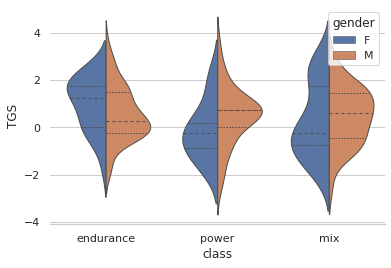

In [94]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=lt_athletes_df, x="class", y="TGS", hue="gender",split=True, inner="quart", linewidth=1)
sns.despine(left=True)

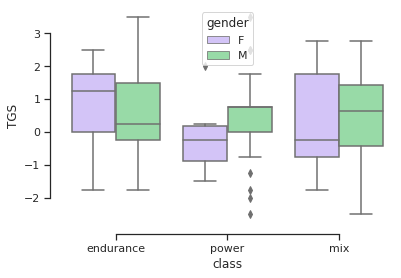

In [95]:
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="class", y="TGS",
            hue="gender", palette=["m", "g"],
            data=lt_athletes_df)
sns.despine(offset=10, trim=True)

# Testing TGS functions Tests of structures and computations
## **Injury markers**

In [33]:
import sys
import itertools
import csv

#from tgs_functions import total_genotype_score, markers, markers_plus, genotype_combinations_tgs, generate_marker_table, marker_table_to_csv,class_table_csv_for_testing,labels

##############################################################################
# Testing markers computing all genotype combinations and TGS  frequency table
##############################################################################

####### Injury markers

injury_gt_list='rs12722 TT, rs1800012 AA, rs679620 GG'
injury_gt_list2='rs12722 CT, rs1800012 AA'

tgs_injury = total_genotype_score(injury_gt_list2,markers['injury'])
print("Injury markers: ",injury_gt_list2)
print("TGS computed: ", tgs_injury)

co = genotype_combinations_tgs(markers['injury'])
tg=co[0]
ft=co[1]

print("Injury markers: all genotype combinations and their TGS:") 
for x in tg:
    print(x)

print("Injury markers: table of TGS frequency distribution:") 
for x in ft:
    print(x)



Injury markers:  rs12722 CT, rs1800012 AA
TGS computed:  [-1.0, -0.36363636363636365]
['rs12722 TT', 'rs1800012 CC', 'rs679620 AA']
['rs12722 TT', 'rs1800012 CC', 'rs679620 AG']
['rs12722 TT', 'rs1800012 CC', 'rs679620 GG']
['rs12722 TT', 'rs1800012 AC', 'rs679620 AA']
['rs12722 TT', 'rs1800012 AC', 'rs679620 AG']
['rs12722 TT', 'rs1800012 AC', 'rs679620 GG']
['rs12722 TT', 'rs1800012 AA', 'rs679620 AA']
['rs12722 TT', 'rs1800012 AA', 'rs679620 AG']
['rs12722 TT', 'rs1800012 AA', 'rs679620 GG']
['rs12722 CT', 'rs1800012 CC', 'rs679620 AA']
['rs12722 CT', 'rs1800012 CC', 'rs679620 AG']
['rs12722 CT', 'rs1800012 CC', 'rs679620 GG']
['rs12722 CT', 'rs1800012 AC', 'rs679620 AA']
['rs12722 CT', 'rs1800012 AC', 'rs679620 AG']
['rs12722 CT', 'rs1800012 AC', 'rs679620 GG']
['rs12722 CT', 'rs1800012 AA', 'rs679620 AA']
['rs12722 CT', 'rs1800012 AA', 'rs679620 AG']
['rs12722 CT', 'rs1800012 AA', 'rs679620 GG']
['rs12722 CC', 'rs1800012 CC', 'rs679620 AA']
['rs12722 CC', 'rs1800012 CC', 'rs679620

## **Power-endurance markers**

In [30]:
####### Endurance and power markers

endurance_power_gt_list='rs699 AA, rs1042713 AG, rs11549465 CT'

tgs_endurance_power = total_genotype_score(endurance_power_gt_list,markers['endurance_power'])
print("Endurance_power markers: ",endurance_power_gt_list) 
print("TGS computed: ", tgs_endurance_power)

co = genotype_combinations_tgs(markers['endurance_power'])
tg=co[0]
ft=co[1]

print("Endurance and power markers: all genotype combinations and their TGS:") 
for x in tg:
    print(x)

print("Endurance and power markers: table of TGS frequency distribution:") 
for x in ft:
    print(x)


Endurance_power markers:  rs699 AA, rs1042713 AG, rs11549465 CT
TGS computed:  [1.0, 0.3333333333333333]
['rs699 AA', 'rs1042713 AA', 'rs11549465 CC']
['rs699 AA', 'rs1042713 AA', 'rs11549465 CT']
['rs699 AA', 'rs1042713 AA', 'rs11549465 TT']
['rs699 AA', 'rs1042713 AG', 'rs11549465 CC']
['rs699 AA', 'rs1042713 AG', 'rs11549465 CT']
['rs699 AA', 'rs1042713 AG', 'rs11549465 TT']
['rs699 AA', 'rs1042713 GG', 'rs11549465 CC']
['rs699 AA', 'rs1042713 GG', 'rs11549465 CT']
['rs699 AA', 'rs1042713 GG', 'rs11549465 TT']
['rs699 AG', 'rs1042713 AA', 'rs11549465 CC']
['rs699 AG', 'rs1042713 AA', 'rs11549465 CT']
['rs699 AG', 'rs1042713 AA', 'rs11549465 TT']
['rs699 AG', 'rs1042713 AG', 'rs11549465 CC']
['rs699 AG', 'rs1042713 AG', 'rs11549465 CT']
['rs699 AG', 'rs1042713 AG', 'rs11549465 TT']
['rs699 AG', 'rs1042713 GG', 'rs11549465 CC']
['rs699 AG', 'rs1042713 GG', 'rs11549465 CT']
['rs699 AG', 'rs1042713 GG', 'rs11549465 TT']
['rs699 GG', 'rs1042713 AA', 'rs11549465 CC']
['rs699 GG', 'rs10427

## **Vitamin B12 markers**

In [31]:


####### Vitamin B12 markers

vitaminB12_gt_list='rs1801133 GG, rs602662 AA, rs526934 AG, rs1801222 CC'

tgs_vitaminB12 = total_genotype_score(vitaminB12_gt_list,markers['vitaminB12'])
print("VitaminB12 markers: ",vitaminB12_gt_list) 
print("TGS computed: ", tgs_vitaminB12)

co = genotype_combinations_tgs(markers['vitaminB12'])
tg=co[0]
ft=co[1]

print("Vitamin B12 status markers: all genotype combinations and their TGS:") 
for x in tg:
    print(x)

print("Vitamin B12 status markers: table of TGS frequency distribution:") 
for x in ft:
    print(x)

VitaminB12 markers:  rs1801133 GG, rs602662 AA, rs526934 AG, rs1801222 CC
TGS computed:  [0.7, 0.175]
['rs1801133 GG', 'rs602662 AA', 'rs526934 AA', 'rs1801222 CC']
['rs1801133 GG', 'rs602662 AA', 'rs526934 AA', 'rs1801222 CT']
['rs1801133 GG', 'rs602662 AA', 'rs526934 AA', 'rs1801222 TT']
['rs1801133 GG', 'rs602662 AA', 'rs526934 AG', 'rs1801222 CC']
['rs1801133 GG', 'rs602662 AA', 'rs526934 AG', 'rs1801222 CT']
['rs1801133 GG', 'rs602662 AA', 'rs526934 AG', 'rs1801222 TT']
['rs1801133 GG', 'rs602662 AA', 'rs526934 GG', 'rs1801222 CC']
['rs1801133 GG', 'rs602662 AA', 'rs526934 GG', 'rs1801222 CT']
['rs1801133 GG', 'rs602662 AA', 'rs526934 GG', 'rs1801222 TT']
['rs1801133 GG', 'rs602662 AG', 'rs526934 AA', 'rs1801222 CC']
['rs1801133 GG', 'rs602662 AG', 'rs526934 AA', 'rs1801222 CT']
['rs1801133 GG', 'rs602662 AG', 'rs526934 AA', 'rs1801222 TT']
['rs1801133 GG', 'rs602662 AG', 'rs526934 AG', 'rs1801222 CC']
['rs1801133 GG', 'rs602662 AG', 'rs526934 AG', 'rs1801222 CT']
['rs1801133 GG',